## **K-Means Clustering**

Steps of the algorithm:

* need to supply the number of clusters (k)
* distances (L2, L1) are calculated for each observation to each cluster (k)
* observations are assigned to a cluster
* process is repeated until the variance in the cluster is a minimum

Drawbacks: you need to know k

**What to do if you have no idea on k**

* plotting PC1 against PC2. Visually determine the clusters
* elbow to determine optimal number of clusters

In [1]:
## text analytics (Amazon Reviews)

review1 = "Outstanding performance and unbeatable value for the price" ## positive
review2 = "Arrived defective and lacked features"  ## negative
review3 = "I was impressed by its exceptional build, value, and outstanding performance" ## positive

In [2]:
## vectorize: represent as a vector
## tokens (variables):
## [outstanding, performance, unbeatable, value, price, defective, lacked, exceptional, impressed]
import numpy as np

rv1 = np.array([1,1,1,1,1,0,0,0,0])
rv2 = np.array([0,0,0,0,0,1,1,0,0])
rv3 = np.array([1,0,0,1,0,0,0,1,1])

In [8]:
## vectorizers: CountVectorizer (counts # times token appears), TF-IDF (frequency)
from sklearn.feature_extraction.text import CountVectorizer

## instance
cv = CountVectorizer(stop_words='english', max_features=8)

## fit and transforms
vectorized_reviews = cv.fit_transform([review1, review2, review3])

In [9]:
## by default a sparse matrix
vectorized_reviews

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [10]:
## dense matrix
vectorized_reviews.todense()

matrix([[0, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 1, 1]])

In [11]:
## tokens
cv.get_feature_names_out()

array(['arrived', 'build', 'defective', 'exceptional', 'features',
       'outstanding', 'performance', 'value'], dtype=object)

In [13]:
## Data Frame
import pandas as pd
pd.DataFrame(vectorized_reviews.todense(), columns=cv.get_feature_names_out())

,arrived,build,defective,exceptional,features,outstanding,performance,value
0,0,0,0,0,0,1,1,1
1,1,0,1,0,1,0,0,0
2,0,1,0,1,0,1,1,1


In [15]:
## Distance Metrics (how different reviews are from each other)

## L2 distance
print(f'L2 distance between review1 and review2: {np.linalg.norm(rv1-rv2)}')
print(f'L2 distance between review1 and review3: {np.linalg.norm(rv1-rv3)}')
print(f'L2 distance between review2 and review3: {np.linalg.norm(rv2-rv3)}')

L2 distance between review1 and review2: 2.6457513110645907
L2 distance between review1 and review3: 2.23606797749979
L2 distance between review2 and review3: 2.449489742783178


In [16]:
## L1 Distance
print(f'L1 distance between review1 and review2: {np.linalg.norm(rv1-rv2, ord=1)}')

L1 distance between review1 and review2: 7.0


In [17]:
## text analytics uses often the COSINE SIMILARITY (distance)
## v1 and v2
## v1.v2  / (||v1||_2 * ||v2||_2)
rv1.dot(rv2) / (np.linalg.norm(rv1) * np.linalg.norm(rv2))

0.0

## k-means example

In [18]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/Netflix_movies_and_tv_shows_clustering.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [19]:
## K-Means Clustering on the show/movie description
df['description']

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


In [20]:
## let's vectorize the description
## frequency-based TF-IDF vectorizer
## use stop_words
from sklearn.feature_extraction.text import TfidfVectorizer

## instance
tf = TfidfVectorizer(stop_words='english', max_features = 300)

## fit transform
X = tf.fit_transform(df['description'])

In [22]:
## sparse
X

<7787x300 sparse matrix of type '<class 'numpy.float64'>'
	with 33425 stored elements in Compressed Sparse Row format>

In [23]:
## dense
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
## visualize tokens and frequencies
pd.DataFrame(X.todense(), columns=tf.get_feature_names_out())

,accident,action,adventure,adventures,agent,ambitious,america,american,amid,army,artist,aspiring,away,band,based,battle,begins,best,big,bond,boss,boy,boyfriend,bring,brings,british,brother,brothers,brutal,business,car,career,case,century,challenges,chance,change,child,childhood,children,christmas,city,class,college,come,comedian,comedy,comes,comic,company,...,stories,story,struggles,struggling,student,students,takes,teacher,team,teams,teen,teenage,teens,things,time,town,travel,travels,tries,trip,true,truth,try,trying,turn,turns,tv,unexpected,unlikely,use,village,violent,war,way,wealthy,wedding,wife,wild,win,winning,woman,women,work,working,world,writer,year,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.575642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.706557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53255,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376308,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.77258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482103,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.404358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [25]:
## create X as a dataframe
X = pd.DataFrame(X.todense(), columns=tf.get_feature_names_out())

In [26]:
## How many clusters?
from sklearn.cluster import KMeans

Text(0, 0.5, 'PC2')

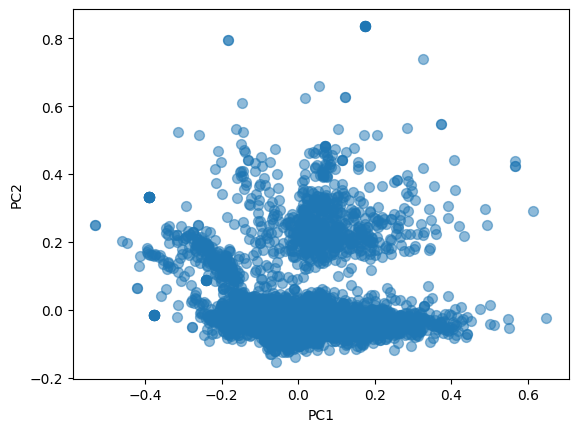

In [28]:
## plot the PC1 and PC2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## instance
pca = PCA(n_components=2)

## fit transform
X_pca = pca.fit_transform(X)

## put it in a dataframe
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

## plot
plt.scatter(X_pca['PC1'], X_pca['PC2'], s = 50, alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [29]:
## did not help too much on determining k
## most common in real data

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

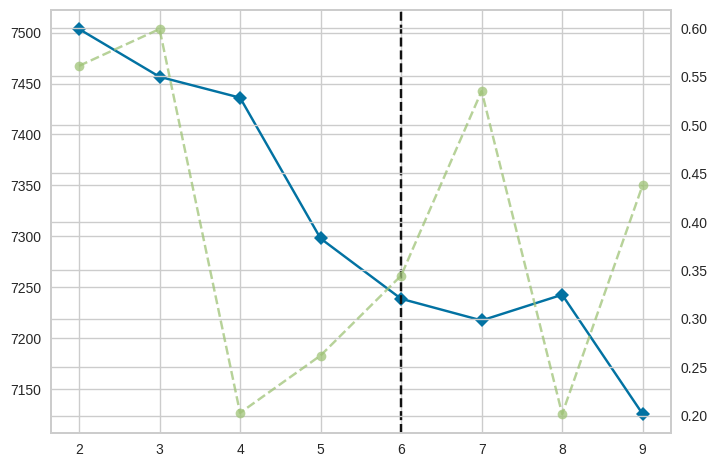

In [30]:
## Elbow Method to determine optimal value of k
## converges often, sometimes it does not
from yellowbrick.cluster import KElbowVisualizer

## instance
model = KMeans() ## make 8 clusters by default

## fit
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)

In [33]:
## optimal k = 6

## instance of kmeans with 6
kmeans = KMeans(n_clusters=6)

## fit
clusters = kmeans.fit_predict(X)

In [34]:
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [35]:
## create a new variable in df called cluster
df['cluster'] = clusters

In [38]:
## show a few
df[['title', 'type', 'cluster']].sort_values(by = "cluster").head(50)

,title,type,cluster
6907,The Stranded,TV Show,0
4237,Mother Goose Club,TV Show,0
6441,The Haunting of Molly Hartley,Movie,0
1978,Elite,TV Show,0
4743,Painted Faces,Movie,0
1385,Chupke Chupke,Movie,0
7329,Undefeated,Movie,0
7330,Under an Arctic Sky,Movie,0
478,AMO,TV Show,0
475,American Vandal,TV Show,0


L2 distance between review1 and review2: 2.6457513110645907
L2 distance between review1 and review3: 2.23606797749979
L2 distance between review2 and review3: 2.449489742783178
L1 distance between review1 and review2: 7.0


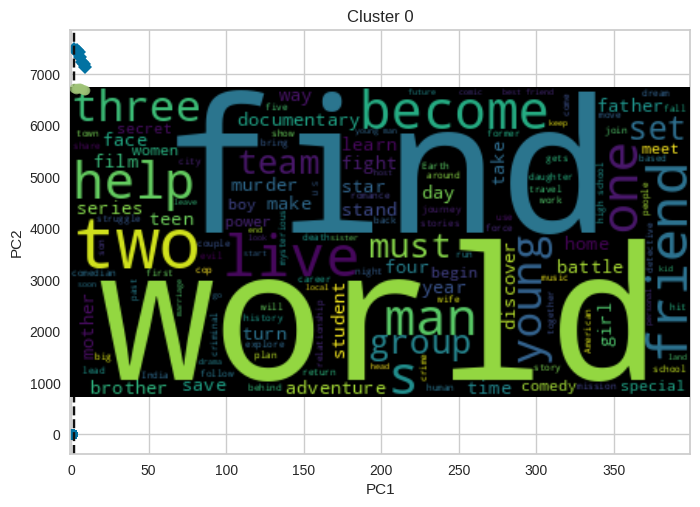

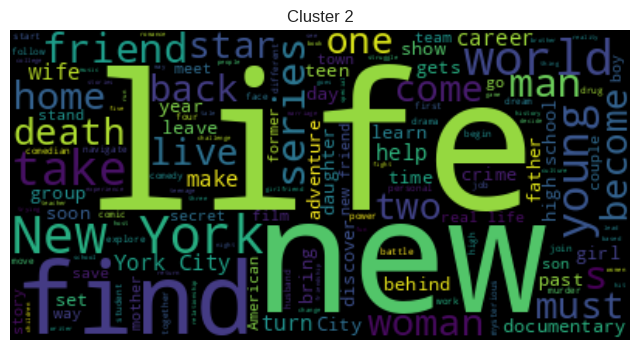

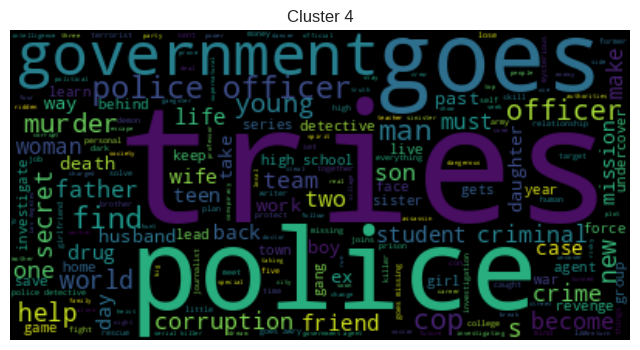

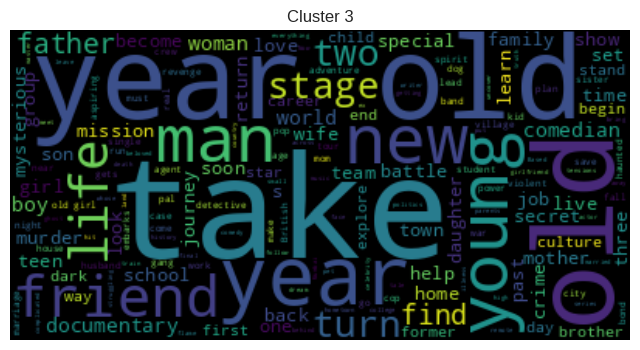

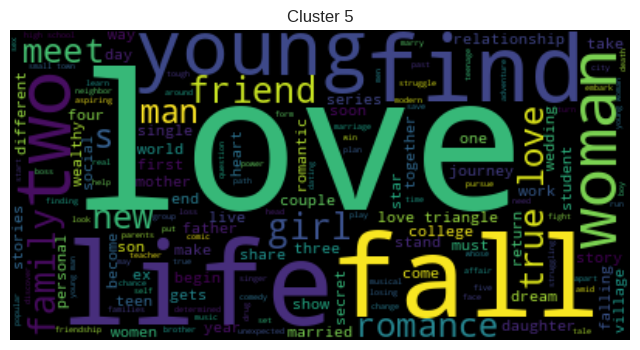

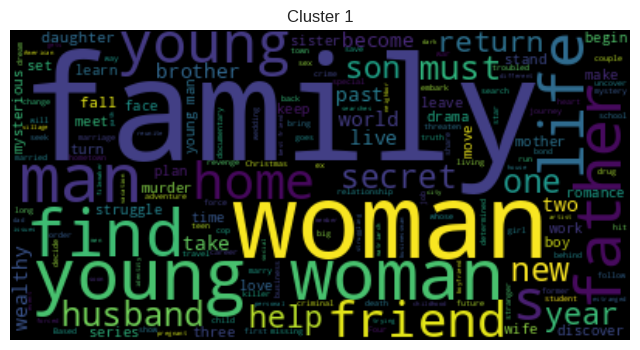

In [39]:
# prompt: create a loop with the clusters and plot a word cloud for each

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud


# ## **K-Means Clustering**
#
# Steps of the algorithm:
#
# * need to supply the number of clusters (k)
# * distances (L2, L1) are calculated for each observation to each cluster (k)
# * observations are assigned to a cluster
# * process is repeated until the variance in the cluster is a minimum
#
# Drawbacks: you need to know k
#
# **What to do if you have no idea on k**
#
# * plotting PC1 against PC2. Visually determine the clusters
# * elbow to determine optimal number of clusters
## text analytics (Amazon Reviews)

review1 = "Outstanding performance and unbeatable value for the price" ## positive
review2 = "Arrived defective and lacked features"  ## negative
review3 = "I was impressed by its exceptional build, value, and outstanding performance" ## positive
## vectorize: represent as a vector
## tokens (variables):
## [outstanding, performance, unbeatable, value, price, defective, lacked, exceptional, impressed]

rv1 = np.array([1,1,1,1,1,0,0,0,0])
rv2 = np.array([0,0,0,0,0,1,1,0,0])
rv3 = np.array([1,0,0,1,0,0,0,1,1])
## vectorizers: CountVectorizer (counts # times token appears), TF-IDF (frequency)

## instance
cv = CountVectorizer(stop_words='english', max_features=8)

## fit and transforms
vectorized_reviews = cv.fit_transform([review1, review2, review3])
## by default a sparse matrix
vectorized_reviews
## dense matrix
vectorized_reviews.todense()
## tokens
cv.get_feature_names_out()
## Data Frame
pd.DataFrame(vectorized_reviews.todense(), columns=cv.get_feature_names_out())
## Distance Metrics (how different reviews are from each other)

## L2 distance
print(f'L2 distance between review1 and review2: {np.linalg.norm(rv1-rv2)}')
print(f'L2 distance between review1 and review3: {np.linalg.norm(rv1-rv3)}')
print(f'L2 distance between review2 and review3: {np.linalg.norm(rv2-rv3)}')
## L1 Distance
print(f'L1 distance between review1 and review2: {np.linalg.norm(rv1-rv2, ord=1)}')
## text analytics uses often the COSINE SIMILARITY (distance)
## v1 and v2
## v1.v2  / (||v1||_2 * ||v2||_2)
rv1.dot(rv2) / (np.linalg.norm(rv1) * np.linalg.norm(rv2))
# ## k-means example

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/Netflix_movies_and_tv_shows_clustering.csv')
df.head()
## K-Means Clustering on the show/movie description
df['description']
## let's vectorize the description
## frequency-based TF-IDF vectorizer
## use stop_words

## instance
tf = TfidfVectorizer(stop_words='english', max_features = 300)

## fit transform
X = tf.fit_transform(df['description'])
## sparse
X
## dense
X.todense()
## visualize tokens and frequencies
pd.DataFrame(X.todense(), columns=tf.get_feature_names_out())
## create X as a dataframe
X = pd.DataFrame(X.todense(), columns=tf.get_feature_names_out())
## How many clusters?
## plot the PC1 and PC2

## instance
pca = PCA(n_components=2)

## fit transform
X_pca = pca.fit_transform(X)

## put it in a dataframe
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

## plot
plt.scatter(X_pca['PC1'], X_pca['PC2'], s = 50, alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
## did not help too much on determining k
## most common in real data
## Elbow Method to determine optimal value of k
## converges often, sometimes it does not

## instance
model = KMeans() ## make 8 clusters by default

## fit
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
## optimal k = 6

## instance of kmeans with 6
kmeans = KMeans(n_clusters=6)

## fit
clusters = kmeans.fit_predict(X)
clusters
## create a new variable in df called cluster
df['cluster'] = clusters
## show a few
df[['title', 'type', 'cluster']].sort_values(by = "cluster").head(50)

for cluster in df['cluster'].unique():
  text = " ".join(review for review in df[df['cluster'] == cluster]['description'])
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster {cluster}')
  plt.axis("off")
  plt.show()
